<h1 style="text-align:center;">PRVA FAZA PROJEKTA</h1>

<h2 style="font-style:italic; font-weight:bold; text-align: center;">
    Coral Reef Global Bleaching
</h2>


### 1. Upoznavanje sa algoritmima za klasifikaciju i regresiju

Nadgledano učenje je pristup mašinskog učenja gde algoritam uči na osnovu ulaznih podataka (features) i poznate izlazne promenljive (target). Cilj je napraviti model koji može da predviđa target za nove, neviđenje podatke.

**Klasifikacija**:
- Koristi se kada je target kategorija (npr. da li je koral belached ili nije)
- Algoritmi: Logistic Regression, Random Forest, Suppport Vector Machine, K-Nearst Neighbour.
- Metrike: Accurecy, Precision, Recall, F1-score, ROC-AUC.
- Prednosti: daje jasnu odluku.
- Mana: ne daje nijasne intenziteta.

**Regresija**:
- Koristi se kada je target numerička vrednost (npr. stepen bleachin-a)
- Algoritmi: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor.
- Metrike: MSE, RMSE, MAE, R².
- Prednosti: daje detaljniji uvid u intenzitet.
- Mana: zahteva da podaci imaju numeričku skalu.

Za ovaj dataset (Coral Reaf Global Bleaching), target je binaran (Bleached = Yas/No), pa je **klasifikacija najbolji izbor** 

### 2. Izbor skupa podataka i definisanje problema

Dataset: Coral Reef Global Bleaching

Link: **[*https://www.kaggle.com/datasets/mehrdat/coral-reef-global-bleaching*](https://www.kaggle.com/datasets/mehrdat/coral-reef-global-bleaching)**

**Opis podataka**:
- Ulazne promenljive: temperatura mora, salinitet, pH vrednost, dubina, geografska lokacija.
- Izlazna promenljiva(target): idntikator bleached-a.

**Definicija problema**:
- Primarni zadatal: klasifikacija → predvideti da li je koral bleached ili nije.
- Sekundarni zadatak: regresija → predvideti intenzitet bleaching-a.

Za ovaj dataset akcenat je na **klasifikaciji**.

### 3. Priprema podataka i deskriptivna analiza

Cilj ovog dela je da se podaci pripreme za modeliranje i da se uradi detaljna analiza. 
Koraci koji se obrađuju:
- Učitavanje podataka i osnovni pregled
- Provera tipova podataka i strukture.
- Statistički opis numeričkih kolona.
- Analiza nedostajućih vrednosti.
- Analiza distribucije target promenljive (Bleaching_Level)
- Vizuelizacija distribucije numeričkih varijabli - Histrogrami
- Analiza outliera -Boxplotovi
- Korelaciona analiza numeričkih varijabli.
- Vizuelizacija odnosa između ključnih varijabli i target promenljive
- Feature engineering (kreiranje dodatnih varijabli)
- Normalizacija i kodiranje podataka 

#### Učitavanje podataka i osnovni pregled
U ovom koraku učitavamo skup svih podatka `coral_whole.csv`pomoću biblioteke `pandas`.
Dataset sadrži informacije o uzorcima korala, njihovim lokacijama, ekosloškim uslovima i noivou bleaching-a.

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Marija\Documents\MASTER STUDIJE VESTACKA INTELIGENCIJA\Masinsko ucenje\PROJEKAT\coral_whole.csv")
print("Dimenzije svih podataka: ", df.shape)
df.head()

Dimenzije svih podataka:  (41361, 18)


,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
0,10324336,49.90,10.00,301.61,Atlantic,Cuba,8519.23,Exposed,0.0287,2005,Colony,304.69,-0.46,-0.80,50.2,300.67,Tropical Atlantic,NaN
1,10324754,51.20,14.00,262.15,Pacific,French Polynesia,1431.62,Exposed,0.0262,1991,Colony,305.01,1.29,1.29,50.7,300.73,Eastern Indo-Pacific,NaN
2,10323866,61.52,7.00,298.79,Atlantic,United Kingdom,182.33,Exposed,0.0429,2006,Colony,304.14,0.04,-2.64,50.9,300.32,Tropical Atlantic,NaN
3,10328028,65.39,9.02,300.16,Atlantic,United States,313.13,Exposed,0.0424,2006,Colony,304.07,-0.07,-2.27,50.9,300.38,Tropical Atlantic,NaN
4,10328029,65.39,12.50,300.15,Atlantic,United States,792.00,Exposed,0.0424,2006,Colony,303.76,0.00,-2.19,50.9,300.38,Tropical Atlantic,NaN


#### Struktura i topovi podataka
Pomoću metode `df.info()` dobijamo pregled strukture skupa podataka:
- **Broj redova:** 41361
- **Broj kolona:** 18
- **Tipovi podataka:**
       - `float64`: 11 kolona (numeričke vrednosti)
       - `int64`: 2 kolone (`Sample_ID`, `Date_Year`)
       - `object`: 5 kolona (tekstualne vrednosti: `Ocean_Name`, `Country_Name`, `Exposure`, `Realm_Name`, `Bleaching_Level`)

**Nedostajuće vrednosti (`NaN`)** su prisutne u sledećim kolonama:
- `Depth_m`, `ClimSST`, `Distance_to_Shore`, `Turbidity`, `Temperature_Maximum`, `SSTA`, `TSA`, `Percent_Bleaching`, `Temperature_Mean`, `Percent_Cover`
- Najviše nedostajućih vrednosti ima kolona `Percent_Cover` (više od 12000)

Sam dataset sadrži kombinaciju numeričkih i kategoričkih podataka, što je pogodno za klasifikaciju.
Potrebno je obraditi nedostajuće vrednosti pre obrade modela.
Target kolona `Bleaching_Level`je trenutno tekstualna (`object`) i mora se pretvoriti u numerički oblik (0/1).


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            41361 non-null  int64  
 1   Cyclone_Frequency    41361 non-null  float64
 2   Depth_m              39562 non-null  float64
 3   ClimSST              41248 non-null  float64
 4   Ocean_Name           41361 non-null  object 
 5   Country_Name         41360 non-null  object 
 6   Distance_to_Shore    41359 non-null  float64
 7   Exposure             41361 non-null  object 
 8   Turbidity            41355 non-null  float64
 9   Date_Year            41361 non-null  int64  
 10  Bleaching_Level      41361 non-null  object 
 11  Temperature_Maximum  41229 non-null  float64
 12  SSTA                 41213 non-null  float64
 13  TSA                  41213 non-null  float64
 14  Percent_Bleaching    34515 non-null  float64
 15  Temperature_Mean     41229 non-null 

#### Statistički opis numeričkih kolona
Pomoću metode `df.describe().T` analziramo osnovne statistike za sve numeričke kolone datasetu.
Za svaku kolonu prikazani su: broj uzorka (`count`), srednja vrednost (`mean`), standardna devijacija (`std`), minimum (`min`), maksimum (`max`) i kvartili (`25%`, `50%`, `75%`).

- **Depth_m**: prosečna dubina je ~6.9 m, većina uzorka je plića od 10m, ali postoje outlieri do 90m.
- **ClimSST**: prosečna temeperatura mora je 294 K (21 °C), ali postoje vrednosti ispod 270 K (~−3 °C) koje su fizički nelogične - verovatno greška u podacima
- **Distance_to_Shore**: prosečna udaljenost je ~3.7 km, ali maksimum je skoro 300km - ekstremne vrendosti koje treba proveriti.
- **Turbidity**: većina je ispod 0.2, ali ima outliera preko 1.2 - moguće greške ili specijalni slučajevi.
- **Temperature_Maximum**: prosečna maksimalna temperatura je 305 K (32 °C), što je u skladu sa očekivanim za tropske vode.
- **SSTA i TSA**: pokazuju temperaturne anomalije i stres - vrednosti su raznovrsne, sa outlierima do ±6.
- **Percent_Bleaching**: prosečan bleaching je ~9.6%, ali maksimum je 100% — što ukazuje na ozbiljne incidente.
- **Percent_Cover**: prosečna pokrivenost je ~19.4%, ali ima mnogo `NaN` vrednosti — razmotriti da li se koristi u modelu.

Analiza pomaže da:
- Identifikujemo varijable koje su informativne za klasifikaciju.
- Uočimo otliere koje treba tretirati.
- Pripremimo podatke za vizuelizaciju i imputaaciju.


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_ID,41361.0,1.012880e+07,1.373151e+06,9623.00,1.031108e+07,1.031628e+07,1.032149e+07,1.033171e+07
Cyclone_Frequency,41361.0,5.215965e+01,7.589593e+00,18.31,4.794000e+01,5.092000e+01,5.573000e+01,1.058000e+02
Depth_m,39562.0,6.922119e+00,4.162464e+00,0.00,3.700000e+00,6.000000e+00,1.000000e+01,9.000000e+01
ClimSST,41248.0,2.941747e+02,1.479956e+01,262.15,2.985500e+02,3.008000e+02,3.020100e+02,3.072200e+02
Distance_to_Shore,41359.0,3.761765e+03,1.355041e+04,3.20,1.247400e+02,4.575200e+02,1.785540e+03,2.992185e+05
Turbidity,41355.0,6.709528e-02,6.301291e-02,0.00,3.350000e-02,5.220000e-02,7.940000e-02,1.284500e+00
Date_Year,41361.0,2.007797e+03,6.073043e+00,1980.00,2.003000e+03,2.007000e+03,2.013000e+03,2.020000e+03
Temperature_Maximum,41229.0,3.051182e+02,1.319680e+00,300.13,3.044100e+02,3.051000e+02,3.057700e+02,3.131400e+02
SSTA,41213.0,2.549424e-01,8.295076e-01,-4.62,-2.500000e-01,2.400000e-01,7.500000e-01,5.900000e+00
TSA,41213.0,-9.809805e-01,1.640874e+00,-11.97,-1.810000e+00,-7.400000e-01,1.000000e-01,5.900000e+00


#### Analiza nedostajućih vrednosti

In [23]:
df.isnull().sum()

Sample_ID                  0
Cyclone_Frequency          0
Depth_m                 1799
ClimSST                  113
Ocean_Name                 0
Country_Name               1
Distance_to_Shore          2
Exposure                   0
Turbidity                  6
Date_Year                  0
Bleaching_Level            0
Temperature_Maximum      132
SSTA                     148
TSA                      148
Percent_Bleaching       6846
Temperature_Mean         132
Realm_Name                 0
Percent_Cover          12455
dtype: int64

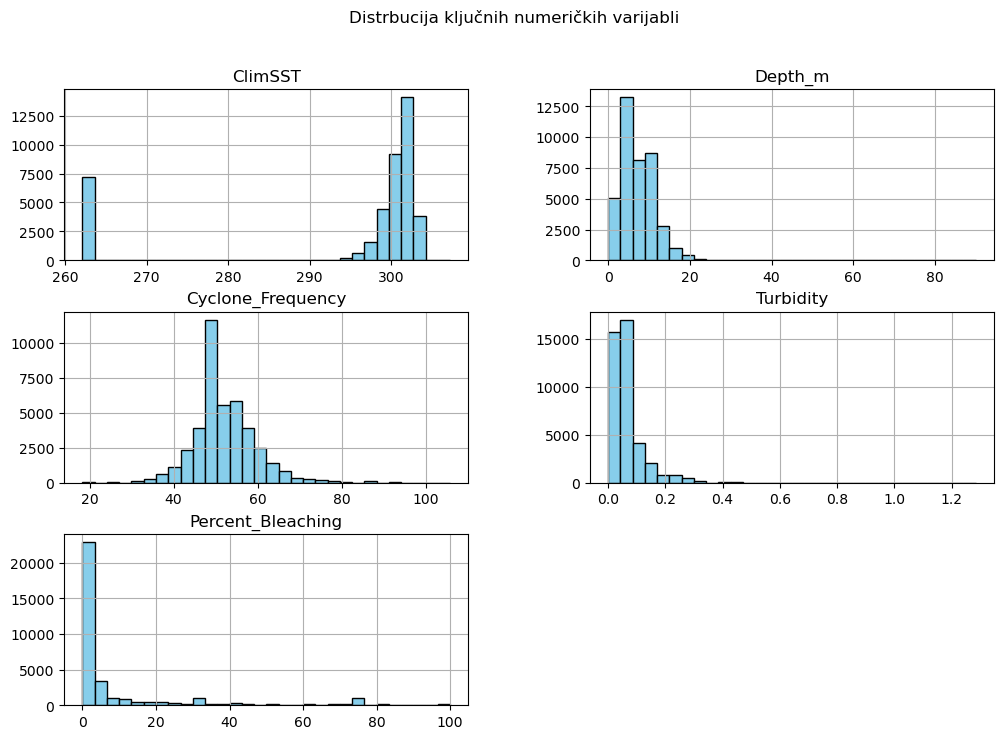

In [20]:
#Histogrami za ključne varijable
import matplotlib.pyplot as plt
cols_to_plot = ["ClimSST", "Depth_m", "Cyclone_Frequency", "Turbidity", "Percent_Bleaching"] 
df[cols_to_plot].hist(bins=30, figsize=(12, 8), color = "skyblue", edgecolor = "black")
plt.suptitle("Distrbucija ključnih numeričkih varijabli")
plt.show()

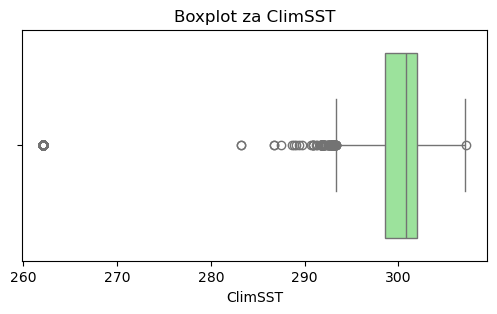

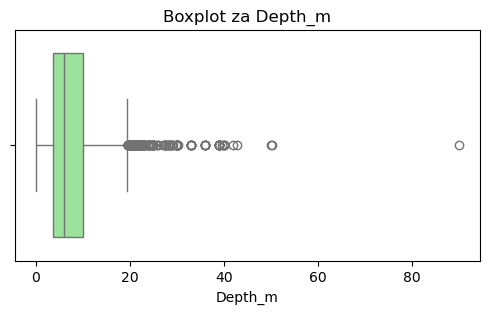

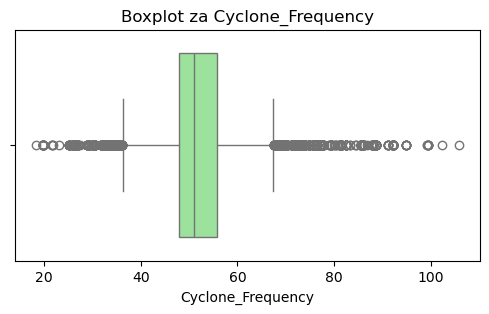

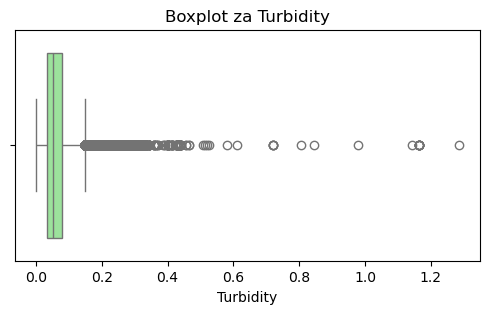

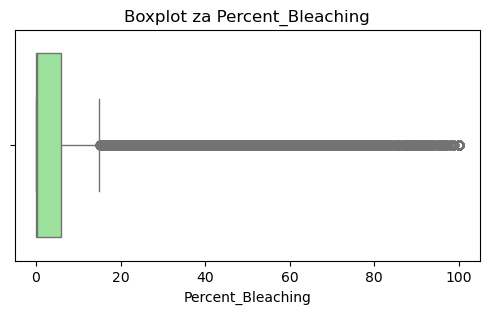

In [11]:
#Boxplot za outliere
import seaborn as sea

for col in cols_to_plot:
    plt.figure(figsize=(6, 3))
    sea.boxplot(x = df[col], color = "lightgreen")
    plt.title(f"Boxplot za {col}")
    plt.show()

#### Korelaciona analiza numeričkih varijabli

In [13]:
#transformacija target kolone
df["Bleaching_Level"].value_counts()

Bleaching_Level
Population    22531
Colony        18830
Name: count, dtype: int64

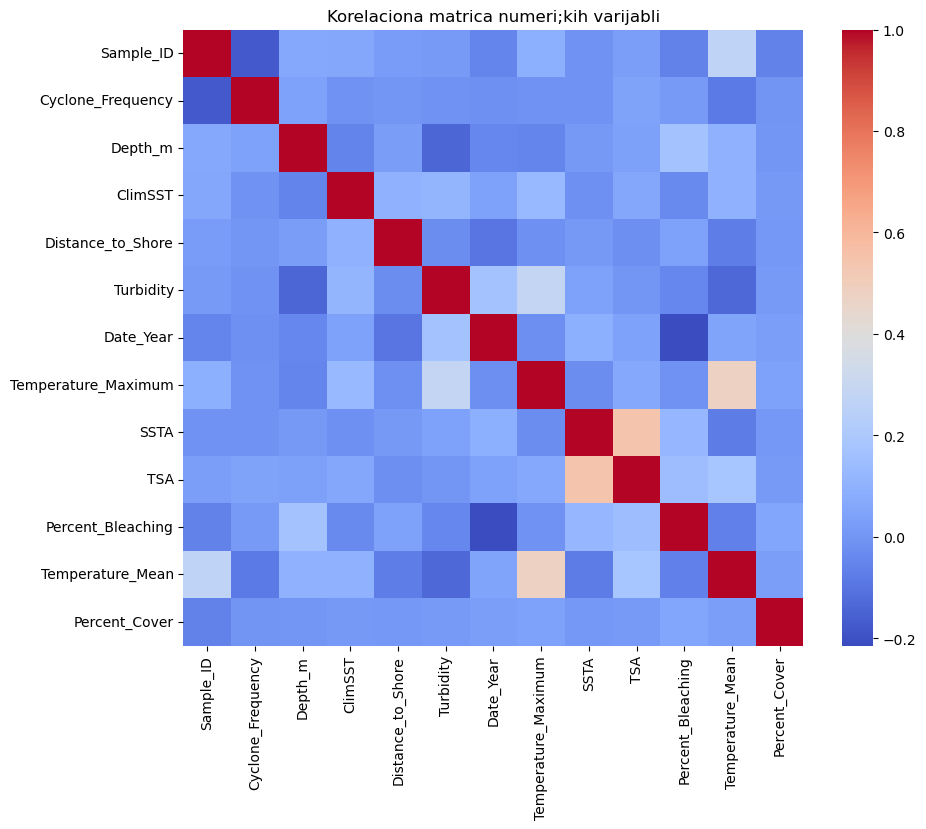

In [28]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize = (10, 8))
sea.heatmap(numeric_df.corr(), cmap = "coolwarm", annot = False)
plt.title("Korelaciona matrica numeri;kih varijabli")
plt.show()

Korelaciona matrica pokazuje da su temperaturne varijable (ClimSST, Temperature_Mean, Temperature_Maximum) međusobno visoko korelisane. Takođe, Percent?Bleaching pokazuje povezanost sa temperaturnim anomalijama (SSTA, TSA), što potvrđuje da su temperaturni stres i odstupanja ključni faktori u bleaching-u.

####  Vizuelizacija odnosa između ključnih varijabli i target-a

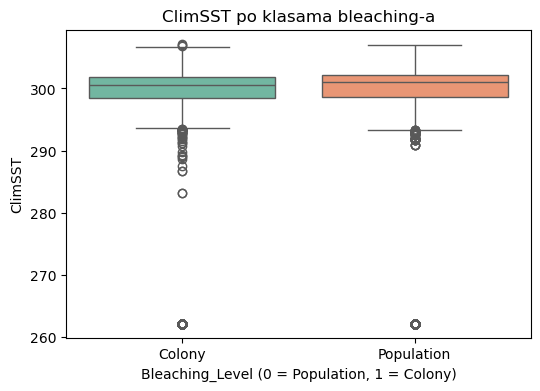

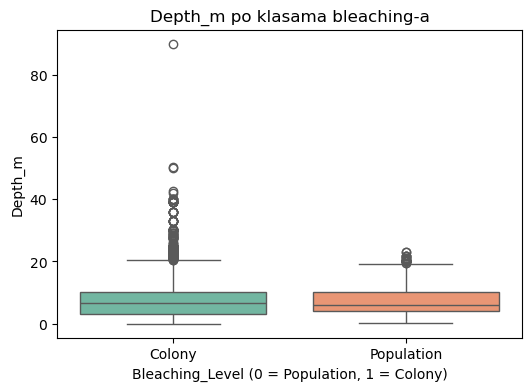

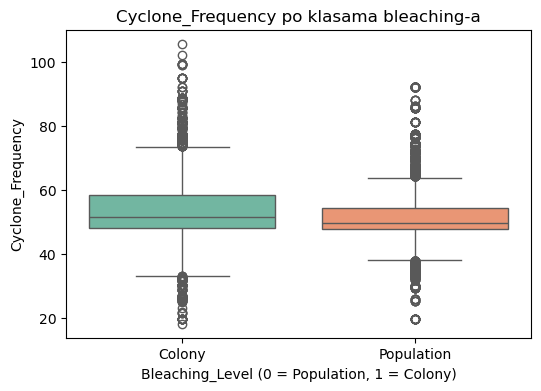

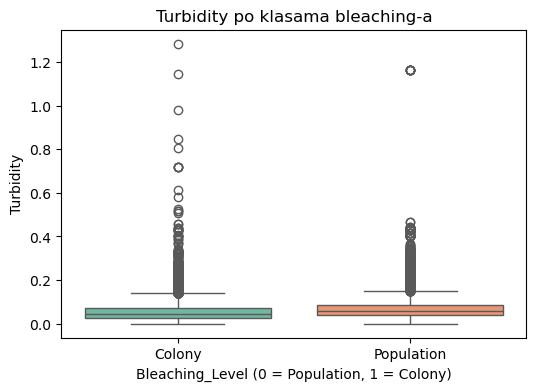

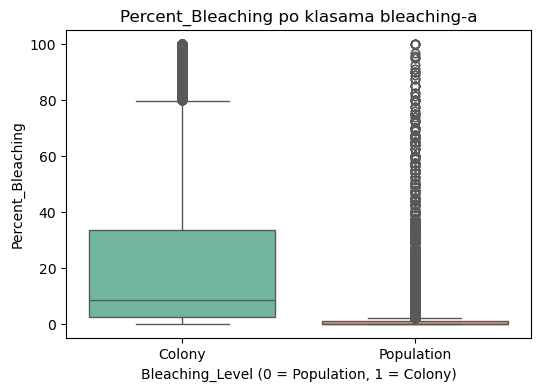

In [30]:
key_vars = ["ClimSST", "Depth_m", "Cyclone_Frequency", "Turbidity", "Percent_Bleaching"]
for var in key_vars:
    plt.figure(figsize=(6, 4))
    sea.boxplot(x="Bleaching_Level", y=var, data=df, hue="Bleaching_Level", palette="Set2", legend=False)
    plt.title(f"{var} po klasama bleaching-a")
    plt.xlabel("Bleaching_Level (0 = Population, 1 = Colony)")
    plt.ylabel(var)
    plt.show()

Boxplotovi pokazuju da kolone sa bleaching-om(Bleach_Level = 1) imaju višu prosečnu temperaturu mora, manju dubinu, veću učestalost ciklona i veći procenat bleaching-a. Ove varijable su informativne za klasifikaciju i treba ih uključiti u model."

In [14]:
df["Bleaching_Level"] = df["Bleaching_Level"].map({"Population": 0, "Colony": 1})

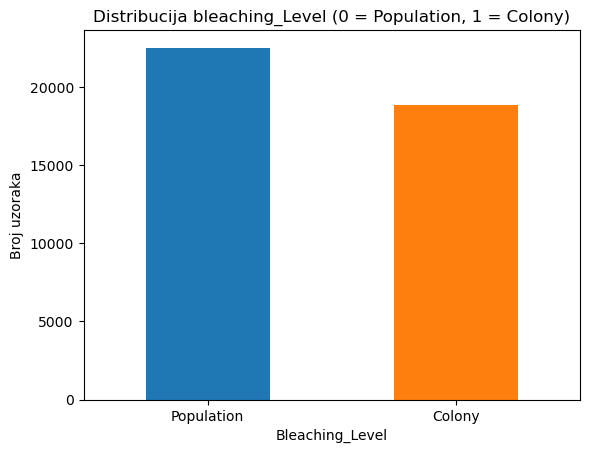

In [16]:
#vizuelizacija distribucije
df["Bleaching_Level"].value_counts().plot(kind = "bar", color =["#1f77b4", "#ff7f0e"])
plt.title("Distribucija bleaching_Level (0 = Population, 1 = Colony)")
plt.ylabel("Broj uzoraka")
plt.xticks([0, 1], ["Population", "Colony"], rotation = 0)
plt.show()

#### Feature engineering

In [31]:
df["Season"] = pd.cut(df["Date_Year"] % 12,
                      bins = [0, 2, 6, 9, 12],
                      labels = ["Winter", "Spring", "Summer", "Autumn"],
                      include_lowest = True)
df["Exposure_bin"] = df["Exposure"].map({"Exposed":1, "Sheltered":0})

Kreirane su dodatne varijable koje mogu poboljšati performanse modela. Season dodaje sezonski kontekst, dok Exposure?bin pretvara tesktualnu izloženost u numerički indikator.

#### Normalizacija i kodiranje podataka

Numeričke kolone su skalirane kako bi se obezbedio isti raspon vrednosti. Kategorialne kolone su kodirane pomoću One-Hot Encoding, čime su tekstualne vrednosti pretvorene u binarne indikatore. Dataset sada sadrži 124 kolone i spreman je sa obradu modela.

In [36]:
num_cols = ["ClimSST", "Depth_m", "Cyclone_Frequency", "Turbidity", "Percent_Bleaching"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df = pd.get_dummies(df, drop_first=True)
print(df.head())
print(df.shape)

   Sample_ID  Cyclone_Frequency   Depth_m   ClimSST  Distance_to_Shore  \
0   10324336          -0.297734  0.739447  0.502407            8519.23   
1   10324754          -0.126444  1.700428 -2.163922            1431.62   
2   10323866           1.233329  0.018711  0.311858             182.33   
3   10328028           1.743244  0.504006  0.404429             313.13   
4   10328029           1.743244  1.340060  0.403754             792.00   

   Turbidity  Date_Year  Temperature_Maximum  SSTA   TSA  ...  \
0  -0.609331       2005               304.69 -0.46 -0.80  ...   
1  -0.649006       1991               305.01  1.29  1.29  ...   
2  -0.383978       2006               304.14  0.04 -2.64  ...   
3  -0.391913       2006               304.07 -0.07 -2.27  ...   
4  -0.391913       2006               303.76  0.00 -2.19  ...   

   Realm_Name_Temperate Southern Africa  Realm_Name_Tropical Atlantic  \
0                                 False                          True   
1                 

Dataset je uspešno pripremljen u skladu sa tehnikama za deskriptivnu analizu. Identifikovane su ključne varijable, outlier i nedostajuće vrednosti. Target kolona je transformisana, kreirane su dodatne promenljive, izvršena je normalizacija i kodiranje. Podaci su sada spremni za obradu.